 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
surv = train['Survived'].value_counts()
surv

Survived
0    549
1    342
Name: count, dtype: int64

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [6]:
train.shape

(891, 12)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train = train.sample(frac=1).reset_index(drop=True)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
1,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
2,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
3,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
4,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
5,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
6,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
7,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
8,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
9,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values</p>

In [9]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
def null_percent(df):
    per=((df.isnull().sum()/len(df))*100).round(5)
    per.sort_values(ascending=False,inplace =True)
    return per
print("Nan Values in train data:")
print(null_percent(train))

print("Nan Values in test data:")
print(null_percent(test))

Nan Values in train data:
Cabin          77.10438
Age            19.86532
Embarked        0.22447
PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
dtype: float64
Nan Values in test data:
Cabin          78.22967
Age            20.57416
Fare            0.23923
PassengerId     0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Embarked        0.00000
dtype: float64


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Filling Nulls</p>

In [11]:
train['Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

train['Cabin'] = train['Cabin'].map({1:True, 0:False})
test['Cabin'] = test['Cabin'].map({1:True, 0:False})

In [12]:
numerical_cols = train.select_dtypes(exclude=['object', 'category'])
numerical_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin'],
      dtype='object')

In [13]:
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = train.select_dtypes(include=['object', 'category'])

In [14]:
def fill_empty_categorical(df):
    for i in categorical_cols:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

train = fill_empty_categorical(train)
train = fill_empty_numerical(train)

test = fill_empty_categorical(test)
test = fill_empty_numerical(test)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Remove Duplicates and Unnecessary Columns</p>

In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

In [17]:
train = train.drop(["Name"], axis=1).copy()
test = test.drop(["Name"], axis=1).copy()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B5.Aggregate Features</p>

In [18]:
train_features = train[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_label = train[['Survived']]

test_features = test[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

In [19]:
X = train.drop(columns=['Survived']).copy()
y = train['Survived']

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.Get Dummies</p>

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    bool   
 9   Embarked     891 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [21]:
# categorical columns with parameters less than 11
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['category','object'] and X[cname].nunique() <5]
categorical_cols

['Sex', 'Embarked']

In [22]:
X = pd.get_dummies(X, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C5.Encoding Categorical</p>

In [23]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['Ticket'], dtype='object')

In [24]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

In [25]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,523.0,7.2500,False,False,True,False,False,True
1,2,1,38.0,1,0,596.0,71.2833,True,True,False,True,False,False
2,3,3,26.0,0,0,669.0,7.9250,False,True,False,False,False,True
3,4,1,35.0,1,0,49.0,53.1000,True,True,False,False,False,True
4,5,3,35.0,0,0,472.0,8.0500,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,101.0,13.0000,False,False,True,False,False,True
887,888,1,19.0,0,0,14.0,30.0000,True,True,False,False,False,True
888,889,3,28.0,1,2,675.0,23.4500,False,True,False,False,False,True
889,890,1,26.0,0,0,8.0,30.0000,True,False,True,True,False,False


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.Normalizing - Scaling Data (optional)</p>

MinMaxScaler doesn't reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [26]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [27]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.271174,0.125,0.0,0.769118,0.014151,0.0,0.0,1.0,0.0,0.0,1.0
1,0.001124,0.0,0.472229,0.125,0.0,0.876471,0.139136,1.0,1.0,0.0,1.0,0.0,0.0
2,0.002247,1.0,0.321438,0.000,0.0,0.983824,0.015469,0.0,1.0,0.0,0.0,0.0,1.0
3,0.003371,0.0,0.434531,0.125,0.0,0.072059,0.103644,1.0,1.0,0.0,0.0,0.0,1.0
4,0.004494,1.0,0.434531,0.000,0.0,0.694118,0.015713,0.0,0.0,1.0,0.0,0.0,1.0


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C8.Delete unnecessary columns</p>

In [28]:
X = X.drop(["PassengerId"], axis=1).copy()
test = test.drop(["PassengerId"], axis=1).copy()

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

In [29]:
# splitting the training dataframe into x(features) and y (target)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=42)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [31]:
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [32]:
X.shape

(891, 12)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.Model 1</p>

In [56]:
model_1 = tf.keras.models.Sequential([
    Flatten(),
    Dense(256, activation=tf.nn.relu),
    Dropout(0.3),
    Dense(128, activation=tf.nn.relu),
    Dropout(0.3),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=50, min_lr=1e-6)

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(X, y, 
                        epochs=550, 
                        verbose=2, 
                        batch_size=128,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/550
7/7 - 2s - 266ms/step - accuracy: 0.5039 - loss: 0.6930 - val_accuracy: 0.7821 - val_loss: 0.6902 - learning_rate: 0.0010
Epoch 2/550
7/7 - 0s - 8ms/step - accuracy: 0.6678 - loss: 0.6887 - val_accuracy: 0.7821 - val_loss: 0.6804 - learning_rate: 0.0010
Epoch 3/550
7/7 - 0s - 8ms/step - accuracy: 0.7172 - loss: 0.6789 - val_accuracy: 0.7765 - val_loss: 0.6630 - learning_rate: 0.0010
Epoch 4/550
7/7 - 0s - 7ms/step - accuracy: 0.7475 - loss: 0.6651 - val_accuracy: 0.7765 - val_loss: 0.6378 - learning_rate: 0.0010
Epoch 5/550
7/7 - 0s - 8ms/step - accuracy: 0.7565 - loss: 0.6489 - val_accuracy: 0.7709 - val_loss: 0.6182 - learning_rate: 0.0010
Epoch 6/550
7/7 - 0s - 7ms/step - accuracy: 0.7789 - loss: 0.6263 - val_accuracy: 0.7933 - val_loss: 0.5971 - learning_rate: 0.0010
Epoch 7/550
7/7 - 0s - 6ms/step - accuracy: 0.8058 - loss: 0.6126 - val_accuracy: 0.8045 - val_loss: 0.5864 - learning_rate: 0.0010
Epoch 8/550
7/7 - 0s - 5ms/step - accuracy: 0.7980 - loss: 0.6074 - val_ac

Epoch 63/550
7/7 - 0s - 8ms/step - accuracy: 0.8227 - loss: 0.5107 - val_accuracy: 0.8156 - val_loss: 0.4956 - learning_rate: 0.0010
Epoch 64/550
7/7 - 0s - 7ms/step - accuracy: 0.8260 - loss: 0.5067 - val_accuracy: 0.8212 - val_loss: 0.4935 - learning_rate: 0.0010
Epoch 65/550
7/7 - 0s - 6ms/step - accuracy: 0.8260 - loss: 0.5088 - val_accuracy: 0.8212 - val_loss: 0.4941 - learning_rate: 0.0010
Epoch 66/550
7/7 - 0s - 7ms/step - accuracy: 0.8249 - loss: 0.5080 - val_accuracy: 0.8268 - val_loss: 0.4945 - learning_rate: 0.0010
Epoch 67/550
7/7 - 0s - 8ms/step - accuracy: 0.8215 - loss: 0.5039 - val_accuracy: 0.8268 - val_loss: 0.4923 - learning_rate: 0.0010
Epoch 68/550
7/7 - 0s - 6ms/step - accuracy: 0.8249 - loss: 0.5064 - val_accuracy: 0.8324 - val_loss: 0.4879 - learning_rate: 0.0010
Epoch 69/550
7/7 - 0s - 7ms/step - accuracy: 0.8249 - loss: 0.5027 - val_accuracy: 0.8268 - val_loss: 0.4877 - learning_rate: 0.0010
Epoch 70/550
7/7 - 0s - 7ms/step - accuracy: 0.8215 - loss: 0.5007 - 

Epoch 125/550
7/7 - 0s - 7ms/step - accuracy: 0.8361 - loss: 0.4462 - val_accuracy: 0.8436 - val_loss: 0.4343 - learning_rate: 0.0010
Epoch 126/550
7/7 - 0s - 6ms/step - accuracy: 0.8316 - loss: 0.4497 - val_accuracy: 0.8492 - val_loss: 0.4321 - learning_rate: 0.0010
Epoch 127/550
7/7 - 0s - 6ms/step - accuracy: 0.8350 - loss: 0.4439 - val_accuracy: 0.8492 - val_loss: 0.4257 - learning_rate: 0.0010
Epoch 128/550
7/7 - 0s - 6ms/step - accuracy: 0.8339 - loss: 0.4456 - val_accuracy: 0.8436 - val_loss: 0.4306 - learning_rate: 0.0010
Epoch 129/550
7/7 - 0s - 7ms/step - accuracy: 0.8283 - loss: 0.4428 - val_accuracy: 0.8492 - val_loss: 0.4300 - learning_rate: 0.0010
Epoch 130/550
7/7 - 0s - 7ms/step - accuracy: 0.8384 - loss: 0.4395 - val_accuracy: 0.8547 - val_loss: 0.4243 - learning_rate: 0.0010
Epoch 131/550
7/7 - 0s - 6ms/step - accuracy: 0.8406 - loss: 0.4420 - val_accuracy: 0.8603 - val_loss: 0.4210 - learning_rate: 0.0010
Epoch 132/550
7/7 - 0s - 8ms/step - accuracy: 0.8384 - loss: 0

Epoch 187/550
7/7 - 0s - 7ms/step - accuracy: 0.8541 - loss: 0.3927 - val_accuracy: 0.8603 - val_loss: 0.3921 - learning_rate: 0.0010
Epoch 188/550
7/7 - 0s - 7ms/step - accuracy: 0.8519 - loss: 0.3917 - val_accuracy: 0.8603 - val_loss: 0.3905 - learning_rate: 0.0010
Epoch 189/550
7/7 - 0s - 5ms/step - accuracy: 0.8485 - loss: 0.3975 - val_accuracy: 0.8603 - val_loss: 0.3892 - learning_rate: 0.0010
Epoch 190/550
7/7 - 0s - 6ms/step - accuracy: 0.8485 - loss: 0.4030 - val_accuracy: 0.8547 - val_loss: 0.3936 - learning_rate: 0.0010
Epoch 191/550
7/7 - 0s - 6ms/step - accuracy: 0.8485 - loss: 0.3919 - val_accuracy: 0.8603 - val_loss: 0.3893 - learning_rate: 0.0010
Epoch 192/550
7/7 - 0s - 7ms/step - accuracy: 0.8563 - loss: 0.3873 - val_accuracy: 0.8659 - val_loss: 0.3887 - learning_rate: 0.0010
Epoch 193/550
7/7 - 0s - 7ms/step - accuracy: 0.8597 - loss: 0.3880 - val_accuracy: 0.8547 - val_loss: 0.3889 - learning_rate: 0.0010
Epoch 194/550
7/7 - 0s - 6ms/step - accuracy: 0.8586 - loss: 0

Epoch 249/550
7/7 - 0s - 7ms/step - accuracy: 0.8631 - loss: 0.3724 - val_accuracy: 0.8603 - val_loss: 0.3690 - learning_rate: 0.0010
Epoch 250/550
7/7 - 0s - 7ms/step - accuracy: 0.8552 - loss: 0.3696 - val_accuracy: 0.8603 - val_loss: 0.3683 - learning_rate: 0.0010
Epoch 251/550
7/7 - 0s - 6ms/step - accuracy: 0.8541 - loss: 0.3649 - val_accuracy: 0.8603 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 252/550
7/7 - 0s - 7ms/step - accuracy: 0.8597 - loss: 0.3725 - val_accuracy: 0.8603 - val_loss: 0.3704 - learning_rate: 0.0010
Epoch 253/550
7/7 - 0s - 7ms/step - accuracy: 0.8530 - loss: 0.3765 - val_accuracy: 0.8547 - val_loss: 0.3694 - learning_rate: 0.0010
Epoch 254/550
7/7 - 0s - 7ms/step - accuracy: 0.8608 - loss: 0.3642 - val_accuracy: 0.8659 - val_loss: 0.3708 - learning_rate: 0.0010
Epoch 255/550
7/7 - 0s - 6ms/step - accuracy: 0.8563 - loss: 0.3711 - val_accuracy: 0.8603 - val_loss: 0.3692 - learning_rate: 0.0010
Epoch 256/550
7/7 - 0s - 7ms/step - accuracy: 0.8631 - loss: 0

Epoch 311/550
7/7 - 0s - 6ms/step - accuracy: 0.8642 - loss: 0.3550 - val_accuracy: 0.8603 - val_loss: 0.3473 - learning_rate: 0.0010
Epoch 312/550
7/7 - 0s - 8ms/step - accuracy: 0.8631 - loss: 0.3481 - val_accuracy: 0.8603 - val_loss: 0.3458 - learning_rate: 0.0010
Epoch 313/550
7/7 - 0s - 6ms/step - accuracy: 0.8586 - loss: 0.3493 - val_accuracy: 0.8659 - val_loss: 0.3429 - learning_rate: 0.0010
Epoch 314/550
7/7 - 0s - 7ms/step - accuracy: 0.8664 - loss: 0.3433 - val_accuracy: 0.8715 - val_loss: 0.3408 - learning_rate: 0.0010
Epoch 315/550
7/7 - 0s - 6ms/step - accuracy: 0.8575 - loss: 0.3514 - val_accuracy: 0.8659 - val_loss: 0.3381 - learning_rate: 0.0010
Epoch 316/550
7/7 - 0s - 8ms/step - accuracy: 0.8608 - loss: 0.3448 - val_accuracy: 0.8659 - val_loss: 0.3405 - learning_rate: 0.0010
Epoch 317/550
7/7 - 0s - 6ms/step - accuracy: 0.8597 - loss: 0.3453 - val_accuracy: 0.8659 - val_loss: 0.3379 - learning_rate: 0.0010
Epoch 318/550
7/7 - 0s - 8ms/step - accuracy: 0.8575 - loss: 0

Epoch 373/550
7/7 - 0s - 8ms/step - accuracy: 0.8552 - loss: 0.3401 - val_accuracy: 0.8659 - val_loss: 0.3346 - learning_rate: 0.0010
Epoch 374/550
7/7 - 0s - 6ms/step - accuracy: 0.8631 - loss: 0.3391 - val_accuracy: 0.8715 - val_loss: 0.3371 - learning_rate: 0.0010
Epoch 375/550
7/7 - 0s - 7ms/step - accuracy: 0.8620 - loss: 0.3429 - val_accuracy: 0.8883 - val_loss: 0.3266 - learning_rate: 0.0010
Epoch 376/550
7/7 - 0s - 7ms/step - accuracy: 0.8586 - loss: 0.3452 - val_accuracy: 0.8883 - val_loss: 0.3236 - learning_rate: 0.0010
Epoch 377/550
7/7 - 0s - 8ms/step - accuracy: 0.8620 - loss: 0.3462 - val_accuracy: 0.8827 - val_loss: 0.3254 - learning_rate: 0.0010
Epoch 378/550
7/7 - 0s - 6ms/step - accuracy: 0.8631 - loss: 0.3375 - val_accuracy: 0.8939 - val_loss: 0.3279 - learning_rate: 0.0010
Epoch 379/550
7/7 - 0s - 7ms/step - accuracy: 0.8608 - loss: 0.3434 - val_accuracy: 0.8827 - val_loss: 0.3331 - learning_rate: 0.0010
Epoch 380/550
7/7 - 0s - 6ms/step - accuracy: 0.8698 - loss: 0

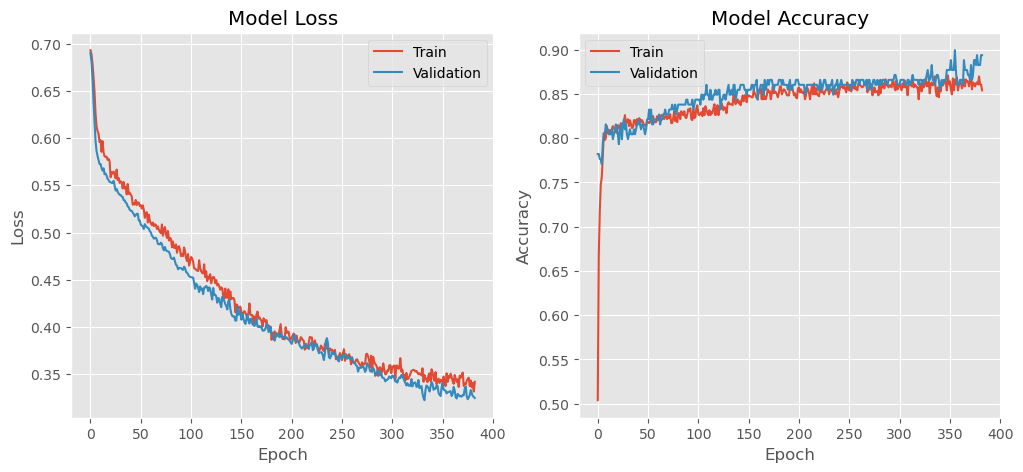

In [57]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [75]:
history_1.history['val_accuracy']

[0.6648044586181641,
 0.6983240246772766,
 0.8156424760818481,
 0.7988826632499695,
 0.7988826632499695,
 0.8044692873954773,
 0.8156424760818481,
 0.7877094745635986,
 0.7932960987091064,
 0.748603343963623,
 0.7932960987091064,
 0.7932960987091064,
 0.7932960987091064,
 0.7988826632499695,
 0.7988826632499695,
 0.7932960987091064,
 0.7988826632499695,
 0.8044692873954773,
 0.8044692873954773,
 0.7988826632499695,
 0.7988826632499695,
 0.8044692873954773,
 0.8044692873954773,
 0.8100558519363403,
 0.8156424760818481,
 0.826815664768219,
 0.7988826632499695,
 0.8100558519363403,
 0.826815664768219,
 0.8100558519363403,
 0.8100558519363403,
 0.8100558519363403,
 0.8212290406227112,
 0.826815664768219,
 0.8100558519363403,
 0.8100558519363403,
 0.8156424760818481,
 0.8156424760818481,
 0.8156424760818481,
 0.8212290406227112,
 0.826815664768219,
 0.826815664768219,
 0.826815664768219,
 0.826815664768219,
 0.8212290406227112,
 0.832402229309082,
 0.826815664768219,
 0.832402229309082,
 0.

In [76]:
history_1.history['accuracy']

[0.48148149251937866,
 0.6498316526412964,
 0.7093153595924377,
 0.747474730014801,
 0.7508417367935181,
 0.7575757503509521,
 0.7878788113594055,
 0.808080792427063,
 0.8002244830131531,
 0.7800224423408508,
 0.7811447978019714,
 0.8013467788696289,
 0.7878788113594055,
 0.8069584965705872,
 0.8148148059844971,
 0.8103255033493042,
 0.81144779920578,
 0.8103255033493042,
 0.81144779920578,
 0.8159371614456177,
 0.8136925101280212,
 0.8181818127632141,
 0.81144779920578,
 0.8170594573020935,
 0.8193041682243347,
 0.8103255033493042,
 0.8159371614456177,
 0.8092031478881836,
 0.8170594573020935,
 0.8181818127632141,
 0.8181818127632141,
 0.8136925101280212,
 0.8181818127632141,
 0.8193041682243347,
 0.8260381817817688,
 0.8226711750030518,
 0.8136925101280212,
 0.8226711750030518,
 0.8249158263206482,
 0.8159371614456177,
 0.8260381817817688,
 0.8282828330993652,
 0.808080792427063,
 0.8181818127632141,
 0.8193041682243347,
 0.8271604776382446,
 0.8271604776382446,
 0.8260381817817688,


In [ ]:
model_1.summary()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A2.Model 2</p>

In [54]:
model_2 = tf.keras.models.Sequential([
    Flatten(),
    Dense(1024, activation=tf.nn.relu),
    Dropout(0.5),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.3),
    Dense(256, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=50, min_lr=1e-6)

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_2= model_2.fit(X, y, 
                        epochs=550, 
                        verbose=2, 
                        batch_size=128,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/550
7/7 - 2s - 298ms/step - accuracy: 0.6083 - loss: 0.6516 - val_accuracy: 0.5866 - val_loss: 0.5627 - learning_rate: 0.0010
Epoch 2/550
7/7 - 0s - 10ms/step - accuracy: 0.6936 - loss: 0.5476 - val_accuracy: 0.7765 - val_loss: 0.5166 - learning_rate: 0.0010
Epoch 3/550
7/7 - 0s - 12ms/step - accuracy: 0.7834 - loss: 0.5174 - val_accuracy: 0.7709 - val_loss: 0.4791 - learning_rate: 0.0010
Epoch 4/550
7/7 - 0s - 10ms/step - accuracy: 0.7856 - loss: 0.4898 - val_accuracy: 0.7821 - val_loss: 0.4654 - learning_rate: 0.0010
Epoch 5/550
7/7 - 0s - 10ms/step - accuracy: 0.7868 - loss: 0.4792 - val_accuracy: 0.7821 - val_loss: 0.4628 - learning_rate: 0.0010
Epoch 6/550
7/7 - 0s - 10ms/step - accuracy: 0.7969 - loss: 0.4709 - val_accuracy: 0.8045 - val_loss: 0.4339 - learning_rate: 0.0010
Epoch 7/550
7/7 - 0s - 10ms/step - accuracy: 0.8058 - loss: 0.4554 - val_accuracy: 0.8101 - val_loss: 0.4217 - learning_rate: 0.0010
Epoch 8/550
7/7 - 0s - 10ms/step - accuracy: 0.8159 - loss: 0.4396 -

Epoch 63/550
7/7 - 0s - 10ms/step - accuracy: 0.8395 - loss: 0.3715 - val_accuracy: 0.8547 - val_loss: 0.3424 - learning_rate: 0.0010
Epoch 64/550
7/7 - 0s - 10ms/step - accuracy: 0.8451 - loss: 0.3597 - val_accuracy: 0.8492 - val_loss: 0.3462 - learning_rate: 0.0010
Epoch 65/550
7/7 - 0s - 11ms/step - accuracy: 0.8395 - loss: 0.3822 - val_accuracy: 0.8547 - val_loss: 0.3471 - learning_rate: 0.0010
Epoch 66/550
7/7 - 0s - 9ms/step - accuracy: 0.8462 - loss: 0.3699 - val_accuracy: 0.8492 - val_loss: 0.3442 - learning_rate: 0.0010
Epoch 67/550
7/7 - 0s - 10ms/step - accuracy: 0.8440 - loss: 0.3691 - val_accuracy: 0.8492 - val_loss: 0.3377 - learning_rate: 0.0010
Epoch 68/550
7/7 - 0s - 9ms/step - accuracy: 0.8384 - loss: 0.3729 - val_accuracy: 0.8492 - val_loss: 0.3391 - learning_rate: 0.0010
Epoch 69/550
7/7 - 0s - 8ms/step - accuracy: 0.8474 - loss: 0.3709 - val_accuracy: 0.8436 - val_loss: 0.3492 - learning_rate: 0.0010
Epoch 70/550
7/7 - 0s - 9ms/step - accuracy: 0.8395 - loss: 0.366

7/7 - 0s - 9ms/step - accuracy: 0.8462 - loss: 0.3558 - val_accuracy: 0.8436 - val_loss: 0.3162 - learning_rate: 0.0010
Epoch 125/550
7/7 - 0s - 11ms/step - accuracy: 0.8552 - loss: 0.3262 - val_accuracy: 0.8547 - val_loss: 0.3021 - learning_rate: 0.0010
Epoch 126/550
7/7 - 0s - 10ms/step - accuracy: 0.8406 - loss: 0.3332 - val_accuracy: 0.8603 - val_loss: 0.3103 - learning_rate: 0.0010
Epoch 127/550
7/7 - 0s - 9ms/step - accuracy: 0.8451 - loss: 0.3384 - val_accuracy: 0.8492 - val_loss: 0.3193 - learning_rate: 0.0010
Epoch 128/550
7/7 - 0s - 9ms/step - accuracy: 0.8462 - loss: 0.3350 - val_accuracy: 0.8492 - val_loss: 0.3050 - learning_rate: 0.0010
Epoch 129/550
7/7 - 0s - 10ms/step - accuracy: 0.8462 - loss: 0.3364 - val_accuracy: 0.8492 - val_loss: 0.3028 - learning_rate: 0.0010
Epoch 130/550
7/7 - 0s - 10ms/step - accuracy: 0.8507 - loss: 0.3333 - val_accuracy: 0.8603 - val_loss: 0.3045 - learning_rate: 0.0010
Epoch 131/550
7/7 - 0s - 10ms/step - accuracy: 0.8462 - loss: 0.3334 - v

Epoch 185/550
7/7 - 0s - 10ms/step - accuracy: 0.8631 - loss: 0.3336 - val_accuracy: 0.8939 - val_loss: 0.2703 - learning_rate: 0.0010
Epoch 186/550
7/7 - 0s - 9ms/step - accuracy: 0.8530 - loss: 0.3274 - val_accuracy: 0.8994 - val_loss: 0.2680 - learning_rate: 0.0010
Epoch 187/550
7/7 - 0s - 10ms/step - accuracy: 0.8642 - loss: 0.3148 - val_accuracy: 0.8883 - val_loss: 0.2908 - learning_rate: 0.0010
Epoch 188/550
7/7 - 0s - 8ms/step - accuracy: 0.8597 - loss: 0.3094 - val_accuracy: 0.8994 - val_loss: 0.2776 - learning_rate: 0.0010
Epoch 189/550
7/7 - 0s - 8ms/step - accuracy: 0.8620 - loss: 0.3237 - val_accuracy: 0.8883 - val_loss: 0.2930 - learning_rate: 0.0010
Epoch 190/550
7/7 - 0s - 9ms/step - accuracy: 0.8597 - loss: 0.3083 - val_accuracy: 0.8883 - val_loss: 0.2727 - learning_rate: 0.0010
Epoch 191/550
7/7 - 0s - 8ms/step - accuracy: 0.8575 - loss: 0.3217 - val_accuracy: 0.8939 - val_loss: 0.2708 - learning_rate: 0.0010
Epoch 192/550
7/7 - 0s - 11ms/step - accuracy: 0.8631 - loss

Epoch 246/550
7/7 - 0s - 10ms/step - accuracy: 0.8799 - loss: 0.2830 - val_accuracy: 0.9106 - val_loss: 0.2420 - learning_rate: 0.0010
Epoch 247/550
7/7 - 0s - 9ms/step - accuracy: 0.8878 - loss: 0.2889 - val_accuracy: 0.9106 - val_loss: 0.2524 - learning_rate: 0.0010
Epoch 248/550
7/7 - 0s - 9ms/step - accuracy: 0.8732 - loss: 0.2955 - val_accuracy: 0.9050 - val_loss: 0.2428 - learning_rate: 0.0010
Epoch 249/550
7/7 - 0s - 12ms/step - accuracy: 0.8765 - loss: 0.2919 - val_accuracy: 0.8994 - val_loss: 0.2605 - learning_rate: 0.0010
Epoch 250/550
7/7 - 0s - 8ms/step - accuracy: 0.8676 - loss: 0.2984 - val_accuracy: 0.9050 - val_loss: 0.2475 - learning_rate: 0.0010
Epoch 251/550
7/7 - 0s - 11ms/step - accuracy: 0.8743 - loss: 0.2932 - val_accuracy: 0.9050 - val_loss: 0.2574 - learning_rate: 0.0010
Epoch 252/550
7/7 - 0s - 9ms/step - accuracy: 0.8754 - loss: 0.2820 - val_accuracy: 0.9106 - val_loss: 0.2502 - learning_rate: 0.0010
Epoch 253/550
7/7 - 0s - 9ms/step - accuracy: 0.8709 - loss

Epoch 307/550
7/7 - 0s - 9ms/step - accuracy: 0.8866 - loss: 0.2758 - val_accuracy: 0.9106 - val_loss: 0.2332 - learning_rate: 0.0010
Epoch 308/550
7/7 - 0s - 8ms/step - accuracy: 0.8855 - loss: 0.2817 - val_accuracy: 0.9106 - val_loss: 0.2347 - learning_rate: 0.0010
Epoch 309/550
7/7 - 0s - 10ms/step - accuracy: 0.8878 - loss: 0.2811 - val_accuracy: 0.9162 - val_loss: 0.2313 - learning_rate: 0.0010
Epoch 310/550
7/7 - 0s - 10ms/step - accuracy: 0.8765 - loss: 0.2881 - val_accuracy: 0.9162 - val_loss: 0.2287 - learning_rate: 0.0010
Epoch 311/550
7/7 - 0s - 9ms/step - accuracy: 0.8777 - loss: 0.2963 - val_accuracy: 0.9106 - val_loss: 0.2341 - learning_rate: 0.0010
Epoch 312/550
7/7 - 0s - 12ms/step - accuracy: 0.8889 - loss: 0.2717 - val_accuracy: 0.9106 - val_loss: 0.2382 - learning_rate: 0.0010
Epoch 313/550
7/7 - 0s - 10ms/step - accuracy: 0.8743 - loss: 0.2979 - val_accuracy: 0.9106 - val_loss: 0.2235 - learning_rate: 0.0010
Epoch 314/550
7/7 - 0s - 9ms/step - accuracy: 0.8889 - los

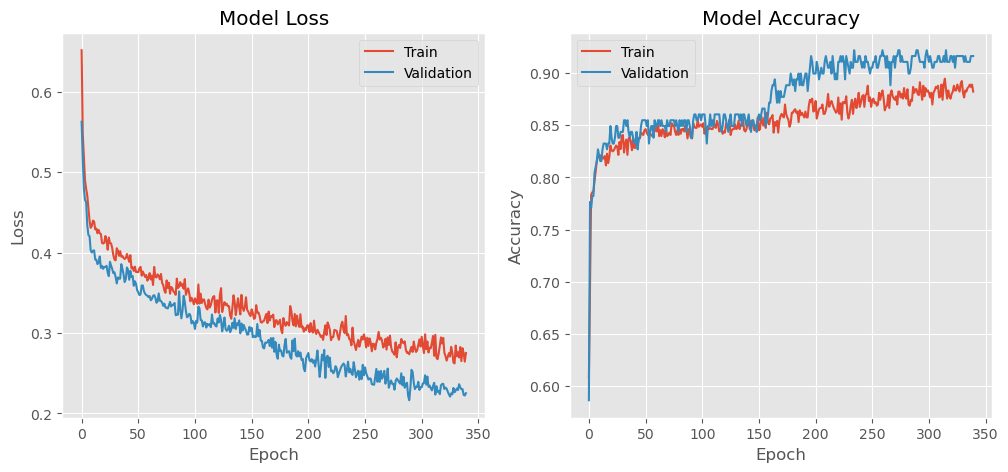

In [55]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [86]:
history_2.history['val_accuracy']

[0.6983240246772766,
 0.7932960987091064,
 0.8100558519363403,
 0.7932960987091064,
 0.8100558519363403,
 0.8044692873954773,
 0.8100558519363403,
 0.8044692873954773,
 0.8212290406227112,
 0.7988826632499695,
 0.8044692873954773,
 0.8100558519363403,
 0.8379888534545898,
 0.7988826632499695,
 0.8379888534545898,
 0.8100558519363403,
 0.7988826632499695,
 0.8100558519363403,
 0.8212290406227112,
 0.826815664768219,
 0.8212290406227112,
 0.8044692873954773,
 0.826815664768219,
 0.8156424760818481,
 0.826815664768219,
 0.8379888534545898,
 0.8156424760818481,
 0.8379888534545898,
 0.8491619825363159,
 0.8156424760818481,
 0.8603351712226868,
 0.826815664768219,
 0.8212290406227112,
 0.8379888534545898,
 0.8212290406227112,
 0.826815664768219,
 0.8435754179954529,
 0.8547486066818237,
 0.8435754179954529,
 0.832402229309082,
 0.832402229309082,
 0.8379888534545898,
 0.8491619825363159,
 0.8435754179954529,
 0.832402229309082,
 0.8435754179954529,
 0.8379888534545898,
 0.832402229309082,
 

In [ ]:
model_2.summary()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A3.Model 3</p>

In [70]:
model_3 = tf.keras.models.Sequential([
    Flatten(),
    Dense(1024, activation=tf.nn.relu),
    Dropout(0.1),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.1),
    Dense(256, activation=tf.nn.relu),
#     Dropout(0.2),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=50, min_lr=1e-6)

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_3= model_3.fit(X, y, 
                        epochs=550, 
                        verbose=2, 
                        batch_size=128,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/550
7/7 - 1s - 156ms/step - accuracy: 0.6678 - loss: 0.5810 - val_accuracy: 0.7821 - val_loss: 0.4553 - learning_rate: 0.0010
Epoch 2/550
7/7 - 0s - 9ms/step - accuracy: 0.7890 - loss: 0.4648 - val_accuracy: 0.8101 - val_loss: 0.4285 - learning_rate: 0.0010
Epoch 3/550
7/7 - 0s - 10ms/step - accuracy: 0.8103 - loss: 0.4582 - val_accuracy: 0.8212 - val_loss: 0.4206 - learning_rate: 0.0010
Epoch 4/550
7/7 - 0s - 7ms/step - accuracy: 0.8159 - loss: 0.4369 - val_accuracy: 0.8045 - val_loss: 0.4288 - learning_rate: 0.0010
Epoch 5/550
7/7 - 0s - 8ms/step - accuracy: 0.8103 - loss: 0.4399 - val_accuracy: 0.8156 - val_loss: 0.4038 - learning_rate: 0.0010
Epoch 6/550
7/7 - 0s - 10ms/step - accuracy: 0.8081 - loss: 0.4347 - val_accuracy: 0.8212 - val_loss: 0.4048 - learning_rate: 0.0010
Epoch 7/550
7/7 - 0s - 10ms/step - accuracy: 0.8171 - loss: 0.4228 - val_accuracy: 0.8212 - val_loss: 0.4084 - learning_rate: 0.0010
Epoch 8/550
7/7 - 0s - 10ms/step - accuracy: 0.8227 - loss: 0.4162 - va

Epoch 63/550
7/7 - 0s - 9ms/step - accuracy: 0.8586 - loss: 0.3187 - val_accuracy: 0.8827 - val_loss: 0.2885 - learning_rate: 0.0010
Epoch 64/550
7/7 - 0s - 9ms/step - accuracy: 0.8721 - loss: 0.3129 - val_accuracy: 0.9106 - val_loss: 0.2859 - learning_rate: 0.0010
Epoch 65/550
7/7 - 0s - 9ms/step - accuracy: 0.8552 - loss: 0.3137 - val_accuracy: 0.8715 - val_loss: 0.2869 - learning_rate: 0.0010
Epoch 66/550
7/7 - 0s - 11ms/step - accuracy: 0.8597 - loss: 0.3158 - val_accuracy: 0.8827 - val_loss: 0.2881 - learning_rate: 0.0010
Epoch 67/550
7/7 - 0s - 9ms/step - accuracy: 0.8642 - loss: 0.3061 - val_accuracy: 0.8827 - val_loss: 0.2814 - learning_rate: 0.0010
Epoch 68/550
7/7 - 0s - 10ms/step - accuracy: 0.8620 - loss: 0.3122 - val_accuracy: 0.8827 - val_loss: 0.3011 - learning_rate: 0.0010
Epoch 69/550
7/7 - 0s - 8ms/step - accuracy: 0.8709 - loss: 0.3192 - val_accuracy: 0.8715 - val_loss: 0.2887 - learning_rate: 0.0010
Epoch 70/550
7/7 - 0s - 10ms/step - accuracy: 0.8676 - loss: 0.3289

Epoch 125/550
7/7 - 0s - 8ms/step - accuracy: 0.8900 - loss: 0.2597 - val_accuracy: 0.9218 - val_loss: 0.2298 - learning_rate: 0.0010
Epoch 126/550
7/7 - 0s - 8ms/step - accuracy: 0.8956 - loss: 0.2589 - val_accuracy: 0.9050 - val_loss: 0.2375 - learning_rate: 0.0010
Epoch 127/550
7/7 - 0s - 9ms/step - accuracy: 0.8911 - loss: 0.2573 - val_accuracy: 0.9162 - val_loss: 0.2383 - learning_rate: 0.0010
Epoch 128/550
7/7 - 0s - 8ms/step - accuracy: 0.8844 - loss: 0.2598 - val_accuracy: 0.9162 - val_loss: 0.2265 - learning_rate: 0.0010
Epoch 129/550
7/7 - 0s - 10ms/step - accuracy: 0.8923 - loss: 0.2632 - val_accuracy: 0.9162 - val_loss: 0.2299 - learning_rate: 0.0010
Epoch 130/550
7/7 - 0s - 9ms/step - accuracy: 0.8866 - loss: 0.2651 - val_accuracy: 0.9106 - val_loss: 0.2348 - learning_rate: 0.0010
Epoch 131/550
7/7 - 0s - 9ms/step - accuracy: 0.8889 - loss: 0.2693 - val_accuracy: 0.9218 - val_loss: 0.2259 - learning_rate: 0.0010
Epoch 132/550
7/7 - 0s - 10ms/step - accuracy: 0.8911 - loss:

Epoch 186/550
7/7 - 0s - 10ms/step - accuracy: 0.9068 - loss: 0.2337 - val_accuracy: 0.9106 - val_loss: 0.2233 - learning_rate: 0.0010
Epoch 187/550
7/7 - 0s - 9ms/step - accuracy: 0.9080 - loss: 0.2258 - val_accuracy: 0.9330 - val_loss: 0.2007 - learning_rate: 0.0010
Epoch 188/550
7/7 - 0s - 9ms/step - accuracy: 0.9024 - loss: 0.2409 - val_accuracy: 0.9385 - val_loss: 0.2142 - learning_rate: 0.0010
Epoch 189/550
7/7 - 0s - 10ms/step - accuracy: 0.8979 - loss: 0.2370 - val_accuracy: 0.9274 - val_loss: 0.2036 - learning_rate: 0.0010
Epoch 190/550
7/7 - 0s - 9ms/step - accuracy: 0.9012 - loss: 0.2344 - val_accuracy: 0.9274 - val_loss: 0.1963 - learning_rate: 0.0010
Epoch 191/550
7/7 - 0s - 10ms/step - accuracy: 0.9012 - loss: 0.2355 - val_accuracy: 0.9497 - val_loss: 0.1912 - learning_rate: 0.0010
Epoch 192/550
7/7 - 0s - 10ms/step - accuracy: 0.8956 - loss: 0.2355 - val_accuracy: 0.9218 - val_loss: 0.2038 - learning_rate: 0.0010
Epoch 193/550
7/7 - 0s - 10ms/step - accuracy: 0.8945 - lo

Epoch 247/550
7/7 - 0s - 9ms/step - accuracy: 0.9001 - loss: 0.2205 - val_accuracy: 0.9441 - val_loss: 0.1893 - learning_rate: 0.0010
Epoch 248/550
7/7 - 0s - 9ms/step - accuracy: 0.9091 - loss: 0.2128 - val_accuracy: 0.9330 - val_loss: 0.1861 - learning_rate: 0.0010
Epoch 249/550
7/7 - 0s - 9ms/step - accuracy: 0.9080 - loss: 0.2137 - val_accuracy: 0.9274 - val_loss: 0.1873 - learning_rate: 0.0010
Epoch 250/550
7/7 - 0s - 9ms/step - accuracy: 0.9214 - loss: 0.2098 - val_accuracy: 0.9385 - val_loss: 0.1770 - learning_rate: 0.0010
Epoch 251/550
7/7 - 0s - 10ms/step - accuracy: 0.9136 - loss: 0.2060 - val_accuracy: 0.9497 - val_loss: 0.1732 - learning_rate: 0.0010
Epoch 252/550
7/7 - 0s - 9ms/step - accuracy: 0.9158 - loss: 0.2022 - val_accuracy: 0.9497 - val_loss: 0.1688 - learning_rate: 0.0010
Epoch 253/550
7/7 - 0s - 9ms/step - accuracy: 0.9192 - loss: 0.2013 - val_accuracy: 0.9330 - val_loss: 0.1861 - learning_rate: 0.0010
Epoch 254/550
7/7 - 0s - 10ms/step - accuracy: 0.9113 - loss:

Epoch 308/550
7/7 - 0s - 9ms/step - accuracy: 0.9158 - loss: 0.1923 - val_accuracy: 0.9497 - val_loss: 0.1665 - learning_rate: 0.0010
Epoch 309/550
7/7 - 0s - 8ms/step - accuracy: 0.9169 - loss: 0.1851 - val_accuracy: 0.9441 - val_loss: 0.1696 - learning_rate: 0.0010
Epoch 310/550
7/7 - 0s - 10ms/step - accuracy: 0.9158 - loss: 0.1943 - val_accuracy: 0.9497 - val_loss: 0.1620 - learning_rate: 0.0010
Epoch 311/550
7/7 - 0s - 10ms/step - accuracy: 0.9226 - loss: 0.1810 - val_accuracy: 0.9553 - val_loss: 0.1626 - learning_rate: 0.0010
Epoch 312/550
7/7 - 0s - 8ms/step - accuracy: 0.9158 - loss: 0.1823 - val_accuracy: 0.9553 - val_loss: 0.1529 - learning_rate: 0.0010
Epoch 313/550
7/7 - 0s - 10ms/step - accuracy: 0.9226 - loss: 0.1855 - val_accuracy: 0.9497 - val_loss: 0.1651 - learning_rate: 0.0010
Epoch 314/550
7/7 - 0s - 9ms/step - accuracy: 0.9147 - loss: 0.1892 - val_accuracy: 0.9441 - val_loss: 0.1608 - learning_rate: 0.0010
Epoch 315/550
7/7 - 0s - 8ms/step - accuracy: 0.9237 - loss

7/7 - 0s - 8ms/step - accuracy: 0.9248 - loss: 0.1713 - val_accuracy: 0.9609 - val_loss: 0.1448 - learning_rate: 0.0010
Epoch 370/550
7/7 - 0s - 9ms/step - accuracy: 0.9248 - loss: 0.1690 - val_accuracy: 0.9553 - val_loss: 0.1516 - learning_rate: 0.0010
Epoch 371/550
7/7 - 0s - 9ms/step - accuracy: 0.9237 - loss: 0.1706 - val_accuracy: 0.9553 - val_loss: 0.1423 - learning_rate: 0.0010
Epoch 372/550
7/7 - 0s - 11ms/step - accuracy: 0.9270 - loss: 0.1673 - val_accuracy: 0.9553 - val_loss: 0.1390 - learning_rate: 0.0010
Epoch 373/550
7/7 - 0s - 8ms/step - accuracy: 0.9282 - loss: 0.1682 - val_accuracy: 0.9553 - val_loss: 0.1424 - learning_rate: 0.0010
Epoch 374/550
7/7 - 0s - 9ms/step - accuracy: 0.9293 - loss: 0.1637 - val_accuracy: 0.9609 - val_loss: 0.1391 - learning_rate: 0.0010
Epoch 375/550
7/7 - 0s - 9ms/step - accuracy: 0.9237 - loss: 0.1719 - val_accuracy: 0.9553 - val_loss: 0.1422 - learning_rate: 0.0010
Epoch 376/550
7/7 - 0s - 10ms/step - accuracy: 0.9226 - loss: 0.1746 - val_

7/7 - 0s - 9ms/step - accuracy: 0.9282 - loss: 0.1627 - val_accuracy: 0.9497 - val_loss: 0.1461 - learning_rate: 0.0010
Epoch 431/550
7/7 - 0s - 10ms/step - accuracy: 0.9237 - loss: 0.1822 - val_accuracy: 0.9553 - val_loss: 0.1359 - learning_rate: 0.0010
Epoch 432/550
7/7 - 0s - 10ms/step - accuracy: 0.9237 - loss: 0.1707 - val_accuracy: 0.9441 - val_loss: 0.1627 - learning_rate: 0.0010
Epoch 433/550
7/7 - 0s - 7ms/step - accuracy: 0.9270 - loss: 0.1667 - val_accuracy: 0.9665 - val_loss: 0.1267 - learning_rate: 0.0010
Epoch 434/550
7/7 - 0s - 10ms/step - accuracy: 0.9237 - loss: 0.1682 - val_accuracy: 0.9553 - val_loss: 0.1500 - learning_rate: 0.0010
Epoch 435/550
7/7 - 0s - 9ms/step - accuracy: 0.9304 - loss: 0.1592 - val_accuracy: 0.9441 - val_loss: 0.1575 - learning_rate: 0.0010
Epoch 436/550
7/7 - 0s - 10ms/step - accuracy: 0.9226 - loss: 0.1712 - val_accuracy: 0.9497 - val_loss: 0.1367 - learning_rate: 0.0010
Epoch 437/550
7/7 - 0s - 9ms/step - accuracy: 0.9158 - loss: 0.1818 - va

Epoch 492/550
7/7 - 0s - 9ms/step - accuracy: 0.9360 - loss: 0.1549 - val_accuracy: 0.9721 - val_loss: 0.1212 - learning_rate: 0.0010
Epoch 493/550
7/7 - 0s - 9ms/step - accuracy: 0.9315 - loss: 0.1586 - val_accuracy: 0.9497 - val_loss: 0.1448 - learning_rate: 0.0010
Epoch 494/550
7/7 - 0s - 9ms/step - accuracy: 0.9304 - loss: 0.1629 - val_accuracy: 0.9553 - val_loss: 0.1282 - learning_rate: 0.0010
Epoch 495/550
7/7 - 0s - 9ms/step - accuracy: 0.9270 - loss: 0.1646 - val_accuracy: 0.9553 - val_loss: 0.1426 - learning_rate: 0.0010
Epoch 496/550
7/7 - 0s - 9ms/step - accuracy: 0.9349 - loss: 0.1533 - val_accuracy: 0.9385 - val_loss: 0.1493 - learning_rate: 0.0010
Epoch 497/550
7/7 - 0s - 9ms/step - accuracy: 0.9158 - loss: 0.1897 - val_accuracy: 0.9274 - val_loss: 0.1720 - learning_rate: 0.0010
Epoch 498/550
7/7 - 0s - 9ms/step - accuracy: 0.9259 - loss: 0.1573 - val_accuracy: 0.9665 - val_loss: 0.1257 - learning_rate: 0.0010
Epoch 499/550
7/7 - 0s - 9ms/step - accuracy: 0.9248 - loss: 0

In [52]:
# model_3.compile(optimizer='SGD',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

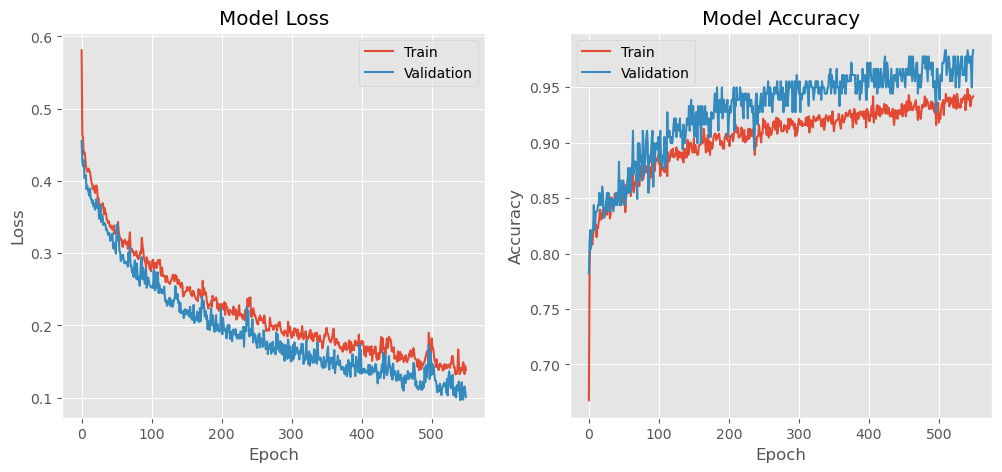

In [71]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [72]:
history_3.history['val_accuracy']

[0.7821229100227356,
 0.8100558519363403,
 0.8212290406227112,
 0.8044692873954773,
 0.8156424760818481,
 0.8212290406227112,
 0.8212290406227112,
 0.8435754179954529,
 0.8212290406227112,
 0.826815664768219,
 0.8379888534545898,
 0.8379888534545898,
 0.8379888534545898,
 0.8435754179954529,
 0.8435754179954529,
 0.8547486066818237,
 0.8435754179954529,
 0.8491619825363159,
 0.8435754179954529,
 0.8603351712226868,
 0.8547486066818237,
 0.832402229309082,
 0.832402229309082,
 0.8379888534545898,
 0.8435754179954529,
 0.8491619825363159,
 0.8547486066818237,
 0.8379888534545898,
 0.8547486066818237,
 0.8435754179954529,
 0.8379888534545898,
 0.8491619825363159,
 0.8491619825363159,
 0.8491619825363159,
 0.8435754179954529,
 0.8379888534545898,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.8547486066818237,
 0.8435754179954529,
 0.8547486066818237,
 0.8547486066818237,
 0.8826815485954285,
 0.8435754179954529,
 0.8659217953681946,
 0.8435754179954529,
 0.8547486066818

In [ ]:
model_3.summary()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A4.Model_4</p>

In [106]:
model_4 = tf.keras.models.Sequential([
    Flatten(),
    Dense(2048, activation=tf.nn.relu),
    Dropout(0.5),
    Dense(1024, activation=tf.nn.relu),
    Dropout(0.3),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),

    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=50, min_lr=1e-6)

model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_4= model_4.fit(X, y, 
                        epochs=550, 
                        verbose=2, 
                        batch_size=128,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/550
7/7 - 1s - 181ms/step - accuracy: 0.6768 - loss: 0.5650 - val_accuracy: 0.7933 - val_loss: 0.4468 - learning_rate: 0.0010
Epoch 2/550
7/7 - 0s - 21ms/step - accuracy: 0.7969 - loss: 0.4718 - val_accuracy: 0.8045 - val_loss: 0.4271 - learning_rate: 0.0010
Epoch 3/550
7/7 - 0s - 24ms/step - accuracy: 0.8081 - loss: 0.4449 - val_accuracy: 0.8101 - val_loss: 0.4067 - learning_rate: 0.0010
Epoch 4/550
7/7 - 0s - 22ms/step - accuracy: 0.8126 - loss: 0.4422 - val_accuracy: 0.8324 - val_loss: 0.3996 - learning_rate: 0.0010
Epoch 5/550
7/7 - 0s - 22ms/step - accuracy: 0.8047 - loss: 0.4469 - val_accuracy: 0.8045 - val_loss: 0.4248 - learning_rate: 0.0010
Epoch 6/550
7/7 - 0s - 22ms/step - accuracy: 0.8249 - loss: 0.4307 - val_accuracy: 0.8045 - val_loss: 0.3952 - learning_rate: 0.0010
Epoch 7/550
7/7 - 0s - 21ms/step - accuracy: 0.8182 - loss: 0.4353 - val_accuracy: 0.8045 - val_loss: 0.4216 - learning_rate: 0.0010
Epoch 8/550
7/7 - 0s - 21ms/step - accuracy: 0.8103 - loss: 0.4278 -

Epoch 63/550
7/7 - 0s - 20ms/step - accuracy: 0.8418 - loss: 0.3499 - val_accuracy: 0.8324 - val_loss: 0.3397 - learning_rate: 0.0010
Epoch 64/550
7/7 - 0s - 20ms/step - accuracy: 0.8350 - loss: 0.3516 - val_accuracy: 0.8492 - val_loss: 0.3278 - learning_rate: 0.0010
Epoch 65/550
7/7 - 0s - 22ms/step - accuracy: 0.8384 - loss: 0.3485 - val_accuracy: 0.8547 - val_loss: 0.3378 - learning_rate: 0.0010
Epoch 66/550
7/7 - 0s - 20ms/step - accuracy: 0.8519 - loss: 0.3381 - val_accuracy: 0.8436 - val_loss: 0.3306 - learning_rate: 0.0010
Epoch 67/550
7/7 - 0s - 23ms/step - accuracy: 0.8496 - loss: 0.3433 - val_accuracy: 0.8436 - val_loss: 0.3270 - learning_rate: 0.0010
Epoch 68/550
7/7 - 0s - 19ms/step - accuracy: 0.8440 - loss: 0.3417 - val_accuracy: 0.8492 - val_loss: 0.3255 - learning_rate: 0.0010
Epoch 69/550
7/7 - 0s - 21ms/step - accuracy: 0.8395 - loss: 0.3473 - val_accuracy: 0.8492 - val_loss: 0.3216 - learning_rate: 0.0010
Epoch 70/550
7/7 - 0s - 21ms/step - accuracy: 0.8541 - loss: 0

Epoch 124/550
7/7 - 0s - 22ms/step - accuracy: 0.8597 - loss: 0.3177 - val_accuracy: 0.8603 - val_loss: 0.3026 - learning_rate: 0.0010
Epoch 125/550
7/7 - 0s - 21ms/step - accuracy: 0.8620 - loss: 0.3181 - val_accuracy: 0.8715 - val_loss: 0.3013 - learning_rate: 0.0010
Epoch 126/550
7/7 - 0s - 21ms/step - accuracy: 0.8698 - loss: 0.3211 - val_accuracy: 0.8659 - val_loss: 0.3051 - learning_rate: 0.0010
Epoch 127/550
7/7 - 0s - 21ms/step - accuracy: 0.8586 - loss: 0.3120 - val_accuracy: 0.8603 - val_loss: 0.2937 - learning_rate: 0.0010
Epoch 128/550
7/7 - 0s - 21ms/step - accuracy: 0.8664 - loss: 0.3078 - val_accuracy: 0.8659 - val_loss: 0.3014 - learning_rate: 0.0010
Epoch 129/550
7/7 - 0s - 21ms/step - accuracy: 0.8642 - loss: 0.3103 - val_accuracy: 0.8603 - val_loss: 0.3029 - learning_rate: 0.0010
Epoch 130/550
7/7 - 0s - 22ms/step - accuracy: 0.8631 - loss: 0.3006 - val_accuracy: 0.8603 - val_loss: 0.2977 - learning_rate: 0.0010
Epoch 131/550
7/7 - 0s - 20ms/step - accuracy: 0.8608 -

Epoch 185/550
7/7 - 0s - 21ms/step - accuracy: 0.8777 - loss: 0.2899 - val_accuracy: 0.8827 - val_loss: 0.2777 - learning_rate: 0.0010
Epoch 186/550
7/7 - 0s - 21ms/step - accuracy: 0.8788 - loss: 0.2859 - val_accuracy: 0.8827 - val_loss: 0.2762 - learning_rate: 0.0010
Epoch 187/550
7/7 - 0s - 19ms/step - accuracy: 0.8844 - loss: 0.2866 - val_accuracy: 0.8827 - val_loss: 0.2830 - learning_rate: 0.0010
Epoch 188/550
7/7 - 0s - 19ms/step - accuracy: 0.8822 - loss: 0.2867 - val_accuracy: 0.8883 - val_loss: 0.2778 - learning_rate: 0.0010
Epoch 189/550
7/7 - 0s - 22ms/step - accuracy: 0.8687 - loss: 0.2930 - val_accuracy: 0.9050 - val_loss: 0.2626 - learning_rate: 0.0010
Epoch 190/550
7/7 - 0s - 22ms/step - accuracy: 0.8855 - loss: 0.2790 - val_accuracy: 0.8994 - val_loss: 0.2729 - learning_rate: 0.0010
Epoch 191/550
7/7 - 0s - 21ms/step - accuracy: 0.8822 - loss: 0.2710 - val_accuracy: 0.8883 - val_loss: 0.2785 - learning_rate: 0.0010
Epoch 192/550
7/7 - 0s - 22ms/step - accuracy: 0.8799 -

Epoch 246/550
7/7 - 0s - 22ms/step - accuracy: 0.8844 - loss: 0.2629 - val_accuracy: 0.9050 - val_loss: 0.2522 - learning_rate: 0.0010
Epoch 247/550
7/7 - 0s - 22ms/step - accuracy: 0.8878 - loss: 0.2647 - val_accuracy: 0.8994 - val_loss: 0.2463 - learning_rate: 0.0010
Epoch 248/550
7/7 - 0s - 21ms/step - accuracy: 0.8923 - loss: 0.2487 - val_accuracy: 0.9050 - val_loss: 0.2444 - learning_rate: 0.0010
Epoch 249/550
7/7 - 0s - 22ms/step - accuracy: 0.8844 - loss: 0.2622 - val_accuracy: 0.8939 - val_loss: 0.2681 - learning_rate: 0.0010
Epoch 250/550
7/7 - 0s - 21ms/step - accuracy: 0.8855 - loss: 0.2700 - val_accuracy: 0.8939 - val_loss: 0.2640 - learning_rate: 0.0010
Epoch 251/550
7/7 - 0s - 22ms/step - accuracy: 0.8923 - loss: 0.2795 - val_accuracy: 0.9050 - val_loss: 0.2445 - learning_rate: 0.0010
Epoch 252/550
7/7 - 0s - 21ms/step - accuracy: 0.8889 - loss: 0.2596 - val_accuracy: 0.9162 - val_loss: 0.2432 - learning_rate: 0.0010
Epoch 253/550
7/7 - 0s - 22ms/step - accuracy: 0.8956 -

Epoch 307/550
7/7 - 0s - 22ms/step - accuracy: 0.8900 - loss: 0.2595 - val_accuracy: 0.9050 - val_loss: 0.2400 - learning_rate: 0.0010
Epoch 308/550
7/7 - 0s - 23ms/step - accuracy: 0.8911 - loss: 0.2582 - val_accuracy: 0.9106 - val_loss: 0.2401 - learning_rate: 0.0010
Epoch 309/550
7/7 - 0s - 19ms/step - accuracy: 0.8866 - loss: 0.2553 - val_accuracy: 0.9050 - val_loss: 0.2530 - learning_rate: 0.0010
Epoch 310/550
7/7 - 0s - 21ms/step - accuracy: 0.8878 - loss: 0.2629 - val_accuracy: 0.9050 - val_loss: 0.2324 - learning_rate: 0.0010
Epoch 311/550
7/7 - 0s - 21ms/step - accuracy: 0.8923 - loss: 0.2565 - val_accuracy: 0.8994 - val_loss: 0.2356 - learning_rate: 0.0010
Epoch 312/550
7/7 - 0s - 19ms/step - accuracy: 0.8923 - loss: 0.2676 - val_accuracy: 0.8994 - val_loss: 0.2397 - learning_rate: 0.0010
Epoch 313/550
7/7 - 0s - 21ms/step - accuracy: 0.8967 - loss: 0.2476 - val_accuracy: 0.9050 - val_loss: 0.2331 - learning_rate: 0.0010
Epoch 314/550
7/7 - 0s - 24ms/step - accuracy: 0.8923 -

Epoch 368/550
7/7 - 0s - 22ms/step - accuracy: 0.8990 - loss: 0.2459 - val_accuracy: 0.9218 - val_loss: 0.2156 - learning_rate: 0.0010
Epoch 369/550
7/7 - 0s - 21ms/step - accuracy: 0.9068 - loss: 0.2321 - val_accuracy: 0.9218 - val_loss: 0.2221 - learning_rate: 0.0010
Epoch 370/550
7/7 - 0s - 21ms/step - accuracy: 0.9057 - loss: 0.2319 - val_accuracy: 0.9106 - val_loss: 0.2240 - learning_rate: 0.0010
Epoch 371/550
7/7 - 0s - 22ms/step - accuracy: 0.8956 - loss: 0.2444 - val_accuracy: 0.9162 - val_loss: 0.2225 - learning_rate: 0.0010
Epoch 372/550
7/7 - 0s - 22ms/step - accuracy: 0.8956 - loss: 0.2475 - val_accuracy: 0.9274 - val_loss: 0.2191 - learning_rate: 0.0010
Epoch 373/550
7/7 - 0s - 21ms/step - accuracy: 0.8979 - loss: 0.2465 - val_accuracy: 0.9330 - val_loss: 0.2104 - learning_rate: 0.0010
Epoch 374/550
7/7 - 0s - 21ms/step - accuracy: 0.8990 - loss: 0.2355 - val_accuracy: 0.9274 - val_loss: 0.2247 - learning_rate: 0.0010
Epoch 375/550
7/7 - 0s - 22ms/step - accuracy: 0.9057 -

Epoch 429/550
7/7 - 0s - 20ms/step - accuracy: 0.9001 - loss: 0.2289 - val_accuracy: 0.9385 - val_loss: 0.2072 - learning_rate: 0.0010
Epoch 430/550
7/7 - 0s - 21ms/step - accuracy: 0.9001 - loss: 0.2409 - val_accuracy: 0.9274 - val_loss: 0.2107 - learning_rate: 0.0010
Epoch 431/550
7/7 - 0s - 20ms/step - accuracy: 0.9035 - loss: 0.2370 - val_accuracy: 0.9218 - val_loss: 0.2197 - learning_rate: 0.0010
Epoch 432/550
7/7 - 0s - 21ms/step - accuracy: 0.8889 - loss: 0.2447 - val_accuracy: 0.9218 - val_loss: 0.2079 - learning_rate: 0.0010
Epoch 433/550
7/7 - 0s - 21ms/step - accuracy: 0.8979 - loss: 0.2355 - val_accuracy: 0.9274 - val_loss: 0.2076 - learning_rate: 0.0010
Epoch 434/550
7/7 - 0s - 24ms/step - accuracy: 0.9035 - loss: 0.2226 - val_accuracy: 0.9330 - val_loss: 0.2067 - learning_rate: 0.0010
Epoch 435/550
7/7 - 0s - 21ms/step - accuracy: 0.9024 - loss: 0.2343 - val_accuracy: 0.8939 - val_loss: 0.2402 - learning_rate: 0.0010
Epoch 436/550
7/7 - 0s - 22ms/step - accuracy: 0.9068 -

Epoch 490/550
7/7 - 0s - 21ms/step - accuracy: 0.9012 - loss: 0.2375 - val_accuracy: 0.9274 - val_loss: 0.1976 - learning_rate: 0.0010
Epoch 491/550
7/7 - 0s - 23ms/step - accuracy: 0.9035 - loss: 0.2235 - val_accuracy: 0.9218 - val_loss: 0.2158 - learning_rate: 0.0010
Epoch 492/550
7/7 - 0s - 24ms/step - accuracy: 0.9012 - loss: 0.2239 - val_accuracy: 0.9162 - val_loss: 0.2261 - learning_rate: 0.0010
Epoch 493/550
7/7 - 0s - 20ms/step - accuracy: 0.9024 - loss: 0.2354 - val_accuracy: 0.9330 - val_loss: 0.2044 - learning_rate: 0.0010
Epoch 494/550
7/7 - 0s - 22ms/step - accuracy: 0.9024 - loss: 0.2389 - val_accuracy: 0.9330 - val_loss: 0.2022 - learning_rate: 0.0010
Epoch 495/550
7/7 - 0s - 20ms/step - accuracy: 0.8956 - loss: 0.2226 - val_accuracy: 0.9274 - val_loss: 0.2157 - learning_rate: 0.0010
Epoch 496/550
7/7 - 0s - 23ms/step - accuracy: 0.9057 - loss: 0.2220 - val_accuracy: 0.9162 - val_loss: 0.2039 - learning_rate: 0.0010
Epoch 497/550
7/7 - 0s - 21ms/step - accuracy: 0.9046 -

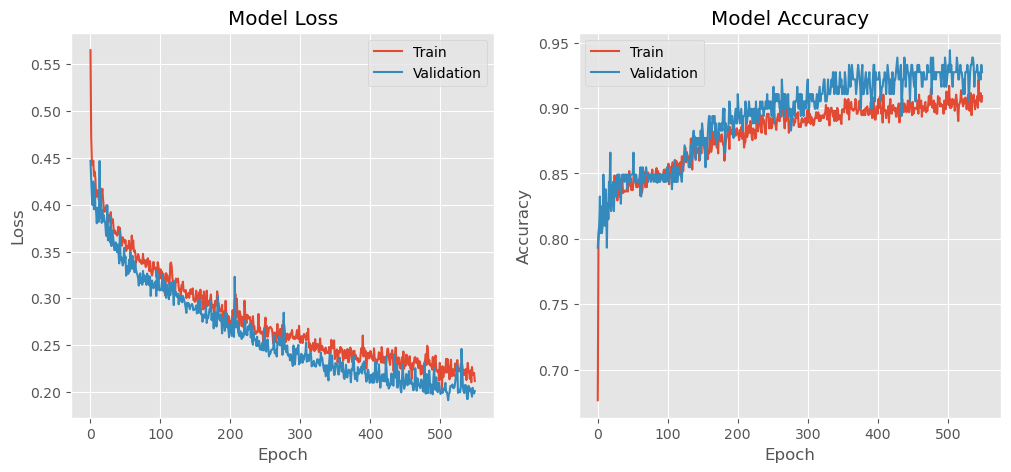

In [107]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [108]:
history_4.history['accuracy']

[0.6767676472663879,
 0.796857476234436,
 0.808080792427063,
 0.8125701546669006,
 0.804713785648346,
 0.8249158263206482,
 0.8181818127632141,
 0.8103255033493042,
 0.8249158263206482,
 0.8237934708595276,
 0.8271604776382446,
 0.8249158263206482,
 0.8215488195419312,
 0.8170594573020935,
 0.8271604776382446,
 0.8148148059844971,
 0.8350168466567993,
 0.8282828330993652,
 0.8237934708595276,
 0.8361391425132751,
 0.8260381817817688,
 0.8271604776382446,
 0.8327721953392029,
 0.8271604776382446,
 0.8484848737716675,
 0.8372614979743958,
 0.8350168466567993,
 0.8361391425132751,
 0.8294051885604858,
 0.8372614979743958,
 0.8395061492919922,
 0.8350168466567993,
 0.8316498398780823,
 0.8451178669929504,
 0.8395061492919922,
 0.8484848737716675,
 0.8350168466567993,
 0.8372614979743958,
 0.8361391425132751,
 0.8361391425132751,
 0.8361391425132751,
 0.8372614979743958,
 0.8395061492919922,
 0.8361391425132751,
 0.8439955115318298,
 0.8518518805503845,
 0.8406285047531128,
 0.8462401628494

In [109]:
history_4.history['val_accuracy']

[0.7932960987091064,
 0.8044692873954773,
 0.8100558519363403,
 0.832402229309082,
 0.8044692873954773,
 0.8044692873954773,
 0.8044692873954773,
 0.8100558519363403,
 0.8491619825363159,
 0.832402229309082,
 0.8100558519363403,
 0.8379888534545898,
 0.8212290406227112,
 0.7932960987091064,
 0.826815664768219,
 0.8156424760818481,
 0.8435754179954529,
 0.8435754179954529,
 0.8659217953681946,
 0.8212290406227112,
 0.826815664768219,
 0.8379888534545898,
 0.8435754179954529,
 0.8212290406227112,
 0.8379888534545898,
 0.8435754179954529,
 0.832402229309082,
 0.8379888534545898,
 0.8491619825363159,
 0.8379888534545898,
 0.8491619825363159,
 0.8491619825363159,
 0.8379888534545898,
 0.826815664768219,
 0.8435754179954529,
 0.8491619825363159,
 0.8491619825363159,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.8491619825363159,
 0.8491619825363159,
 0.8379888534545898,
 0.8491619825363159,
 0.8491619825363159,
 0.8435754179954529,
 0.8435754179954529,
 0.8491619825363159

In [86]:
history_4.history['loss']

[0.7431201934814453,
 0.6826415061950684,
 0.6517115831375122,
 0.6317280530929565,
 0.6156257390975952,
 0.601402223110199,
 0.5892291069030762,
 0.5778862237930298,
 0.5673125982284546,
 0.5580461621284485,
 0.5491687059402466,
 0.5410789847373962,
 0.533504068851471,
 0.5267763733863831,
 0.5206975340843201,
 0.5155966281890869,
 0.5107274651527405,
 0.5061969757080078,
 0.501737654209137,
 0.4981127083301544,
 0.4948437213897705,
 0.4920641779899597,
 0.4898466467857361,
 0.4875554144382477,
 0.48538365960121155,
 0.48365315794944763,
 0.4819364547729492,
 0.48033398389816284,
 0.478999525308609,
 0.4776228964328766,
 0.4764753580093384,
 0.475326269865036,
 0.47423839569091797,
 0.47338443994522095,
 0.4723687469959259,
 0.4716404974460602,
 0.4707614481449127,
 0.46982020139694214,
 0.46935930848121643,
 0.4685003161430359,
 0.4676220118999481,
 0.4669937491416931,
 0.4662187993526459,
 0.4656480550765991,
 0.46503719687461853,
 0.46436700224876404,
 0.46351802349090576,
 0.46295

In [84]:
history_4.history['val_loss']

[0.42166611552238464,
 0.42362943291664124,
 0.42257335782051086,
 0.42278122901916504,
 0.4231681525707245,
 0.4256974160671234,
 0.4242580533027649,
 0.42543041706085205,
 0.42569565773010254,
 0.42534974217414856,
 0.4260690212249756,
 0.4264477789402008,
 0.4270472228527069,
 0.4268254041671753,
 0.427199125289917,
 0.4277678430080414,
 0.42819494009017944,
 0.4283449053764343,
 0.42843303084373474,
 0.4280499815940857,
 0.4284926652908325,
 0.4285435676574707,
 0.4293687641620636,
 0.429051011800766,
 0.4291587769985199,
 0.42958319187164307,
 0.4297676682472229,
 0.43002787232398987,
 0.4302867352962494,
 0.43234172463417053,
 0.43001723289489746,
 0.43081071972846985,
 0.431031733751297,
 0.4308622479438782,
 0.43115323781967163,
 0.4321346580982208,
 0.43404197692871094,
 0.4320034980773926,
 0.43220973014831543,
 0.43177589774131775,
 0.43191656470298767,
 0.4315226376056671,
 0.4320774972438812,
 0.43213656544685364,
 0.43171989917755127,
 0.43248632550239563,
 0.432476073503

In [44]:
model_4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,637 (522.02 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,092 (348.02 KB)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A5.Model_5</p>

In [66]:
model_5 = tf.keras.models.Sequential([
    Flatten(),
    Dense(1024, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(512, activation=tf.nn.relu),
     Dropout(0.1),
     Dense(256, activation=tf.nn.relu),
#     Dropout(0.1),

    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=80, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=80, min_lr=1e-6)

model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_5= model_5.fit(X, y, 
                        epochs=1000, 
                        verbose=2, 
                        batch_size=128,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/1000
7/7 - 1s - 161ms/step - accuracy: 0.6521 - loss: 0.5705 - val_accuracy: 0.7765 - val_loss: 0.4681 - learning_rate: 0.0010
Epoch 2/1000
7/7 - 0s - 10ms/step - accuracy: 0.7901 - loss: 0.4745 - val_accuracy: 0.8045 - val_loss: 0.4440 - learning_rate: 0.0010
Epoch 3/1000
7/7 - 0s - 9ms/step - accuracy: 0.8002 - loss: 0.4569 - val_accuracy: 0.8156 - val_loss: 0.4178 - learning_rate: 0.0010
Epoch 4/1000
7/7 - 0s - 9ms/step - accuracy: 0.8159 - loss: 0.4574 - val_accuracy: 0.7765 - val_loss: 0.4469 - learning_rate: 0.0010
Epoch 5/1000
7/7 - 0s - 10ms/step - accuracy: 0.8036 - loss: 0.4475 - val_accuracy: 0.8156 - val_loss: 0.4099 - learning_rate: 0.0010
Epoch 6/1000
7/7 - 0s - 9ms/step - accuracy: 0.8092 - loss: 0.4404 - val_accuracy: 0.8101 - val_loss: 0.4041 - learning_rate: 0.0010
Epoch 7/1000
7/7 - 0s - 9ms/step - accuracy: 0.8193 - loss: 0.4284 - val_accuracy: 0.8268 - val_loss: 0.4024 - learning_rate: 0.0010
Epoch 8/1000
7/7 - 0s - 10ms/step - accuracy: 0.8260 - loss: 0.41

Epoch 62/1000
7/7 - 0s - 9ms/step - accuracy: 0.8575 - loss: 0.3239 - val_accuracy: 0.8492 - val_loss: 0.3050 - learning_rate: 0.0010
Epoch 63/1000
7/7 - 0s - 9ms/step - accuracy: 0.8552 - loss: 0.3245 - val_accuracy: 0.8659 - val_loss: 0.3068 - learning_rate: 0.0010
Epoch 64/1000
7/7 - 0s - 10ms/step - accuracy: 0.8541 - loss: 0.3218 - val_accuracy: 0.8436 - val_loss: 0.3052 - learning_rate: 0.0010
Epoch 65/1000
7/7 - 0s - 9ms/step - accuracy: 0.8563 - loss: 0.3149 - val_accuracy: 0.8436 - val_loss: 0.2959 - learning_rate: 0.0010
Epoch 66/1000
7/7 - 0s - 9ms/step - accuracy: 0.8541 - loss: 0.3187 - val_accuracy: 0.8715 - val_loss: 0.2854 - learning_rate: 0.0010
Epoch 67/1000
7/7 - 0s - 9ms/step - accuracy: 0.8575 - loss: 0.3156 - val_accuracy: 0.8268 - val_loss: 0.3184 - learning_rate: 0.0010
Epoch 68/1000
7/7 - 0s - 9ms/step - accuracy: 0.8541 - loss: 0.3179 - val_accuracy: 0.8715 - val_loss: 0.2853 - learning_rate: 0.0010
Epoch 69/1000
7/7 - 0s - 10ms/step - accuracy: 0.8530 - loss:

Epoch 123/1000
7/7 - 0s - 9ms/step - accuracy: 0.8866 - loss: 0.2783 - val_accuracy: 0.9218 - val_loss: 0.2352 - learning_rate: 0.0010
Epoch 124/1000
7/7 - 0s - 9ms/step - accuracy: 0.8889 - loss: 0.2688 - val_accuracy: 0.9106 - val_loss: 0.2320 - learning_rate: 0.0010
Epoch 125/1000
7/7 - 0s - 9ms/step - accuracy: 0.8911 - loss: 0.2697 - val_accuracy: 0.9218 - val_loss: 0.2341 - learning_rate: 0.0010
Epoch 126/1000
7/7 - 0s - 9ms/step - accuracy: 0.8799 - loss: 0.2699 - val_accuracy: 0.9106 - val_loss: 0.2403 - learning_rate: 0.0010
Epoch 127/1000
7/7 - 0s - 8ms/step - accuracy: 0.8732 - loss: 0.2760 - val_accuracy: 0.9050 - val_loss: 0.2335 - learning_rate: 0.0010
Epoch 128/1000
7/7 - 0s - 9ms/step - accuracy: 0.8956 - loss: 0.2651 - val_accuracy: 0.9050 - val_loss: 0.2423 - learning_rate: 0.0010
Epoch 129/1000
7/7 - 0s - 9ms/step - accuracy: 0.8822 - loss: 0.2712 - val_accuracy: 0.9218 - val_loss: 0.2287 - learning_rate: 0.0010
Epoch 130/1000
7/7 - 0s - 9ms/step - accuracy: 0.8799 -

Epoch 184/1000
7/7 - 0s - 7ms/step - accuracy: 0.8967 - loss: 0.2440 - val_accuracy: 0.9218 - val_loss: 0.1949 - learning_rate: 0.0010
Epoch 185/1000
7/7 - 0s - 9ms/step - accuracy: 0.9024 - loss: 0.2440 - val_accuracy: 0.9162 - val_loss: 0.2159 - learning_rate: 0.0010
Epoch 186/1000
7/7 - 0s - 10ms/step - accuracy: 0.8956 - loss: 0.2448 - val_accuracy: 0.9162 - val_loss: 0.2118 - learning_rate: 0.0010
Epoch 187/1000
7/7 - 0s - 9ms/step - accuracy: 0.8967 - loss: 0.2460 - val_accuracy: 0.9274 - val_loss: 0.2057 - learning_rate: 0.0010
Epoch 188/1000
7/7 - 0s - 10ms/step - accuracy: 0.8956 - loss: 0.2385 - val_accuracy: 0.9218 - val_loss: 0.1957 - learning_rate: 0.0010
Epoch 189/1000
7/7 - 0s - 9ms/step - accuracy: 0.8990 - loss: 0.2307 - val_accuracy: 0.9218 - val_loss: 0.2090 - learning_rate: 0.0010
Epoch 190/1000
7/7 - 0s - 9ms/step - accuracy: 0.9035 - loss: 0.2390 - val_accuracy: 0.9218 - val_loss: 0.2080 - learning_rate: 0.0010
Epoch 191/1000
7/7 - 0s - 9ms/step - accuracy: 0.8990

Epoch 245/1000
7/7 - 0s - 11ms/step - accuracy: 0.9136 - loss: 0.2204 - val_accuracy: 0.9385 - val_loss: 0.1914 - learning_rate: 0.0010
Epoch 246/1000
7/7 - 0s - 9ms/step - accuracy: 0.8945 - loss: 0.2281 - val_accuracy: 0.9441 - val_loss: 0.1912 - learning_rate: 0.0010
Epoch 247/1000
7/7 - 0s - 9ms/step - accuracy: 0.9080 - loss: 0.2156 - val_accuracy: 0.9385 - val_loss: 0.1951 - learning_rate: 0.0010
Epoch 248/1000
7/7 - 0s - 8ms/step - accuracy: 0.9046 - loss: 0.2268 - val_accuracy: 0.9218 - val_loss: 0.1908 - learning_rate: 0.0010
Epoch 249/1000
7/7 - 0s - 10ms/step - accuracy: 0.9012 - loss: 0.2135 - val_accuracy: 0.9330 - val_loss: 0.1940 - learning_rate: 0.0010
Epoch 250/1000
7/7 - 0s - 9ms/step - accuracy: 0.9012 - loss: 0.2276 - val_accuracy: 0.9385 - val_loss: 0.1950 - learning_rate: 0.0010
Epoch 251/1000
7/7 - 0s - 10ms/step - accuracy: 0.9125 - loss: 0.2227 - val_accuracy: 0.9330 - val_loss: 0.1801 - learning_rate: 0.0010
Epoch 252/1000
7/7 - 0s - 9ms/step - accuracy: 0.905

Epoch 306/1000
7/7 - 0s - 9ms/step - accuracy: 0.9046 - loss: 0.2149 - val_accuracy: 0.9330 - val_loss: 0.1975 - learning_rate: 0.0010
Epoch 307/1000
7/7 - 0s - 9ms/step - accuracy: 0.9068 - loss: 0.2103 - val_accuracy: 0.9441 - val_loss: 0.1809 - learning_rate: 0.0010
Epoch 308/1000
7/7 - 0s - 9ms/step - accuracy: 0.9080 - loss: 0.1985 - val_accuracy: 0.9441 - val_loss: 0.1755 - learning_rate: 0.0010
Epoch 309/1000
7/7 - 0s - 9ms/step - accuracy: 0.9136 - loss: 0.2066 - val_accuracy: 0.9385 - val_loss: 0.1749 - learning_rate: 0.0010
Epoch 310/1000
7/7 - 0s - 9ms/step - accuracy: 0.9147 - loss: 0.2062 - val_accuracy: 0.9385 - val_loss: 0.1705 - learning_rate: 0.0010
Epoch 311/1000
7/7 - 0s - 9ms/step - accuracy: 0.9147 - loss: 0.2058 - val_accuracy: 0.9385 - val_loss: 0.1708 - learning_rate: 0.0010
Epoch 312/1000
7/7 - 0s - 9ms/step - accuracy: 0.9125 - loss: 0.2075 - val_accuracy: 0.9441 - val_loss: 0.1795 - learning_rate: 0.0010
Epoch 313/1000
7/7 - 0s - 9ms/step - accuracy: 0.9158 -

Epoch 367/1000
7/7 - 0s - 9ms/step - accuracy: 0.9169 - loss: 0.1914 - val_accuracy: 0.9441 - val_loss: 0.1695 - learning_rate: 0.0010
Epoch 368/1000
7/7 - 0s - 8ms/step - accuracy: 0.9091 - loss: 0.1882 - val_accuracy: 0.9441 - val_loss: 0.1702 - learning_rate: 0.0010
Epoch 369/1000
7/7 - 0s - 9ms/step - accuracy: 0.9203 - loss: 0.1879 - val_accuracy: 0.9441 - val_loss: 0.1711 - learning_rate: 0.0010
Epoch 370/1000
7/7 - 0s - 9ms/step - accuracy: 0.9169 - loss: 0.1898 - val_accuracy: 0.9441 - val_loss: 0.1686 - learning_rate: 0.0010
Epoch 371/1000
7/7 - 0s - 9ms/step - accuracy: 0.9125 - loss: 0.1991 - val_accuracy: 0.9497 - val_loss: 0.1595 - learning_rate: 0.0010
Epoch 372/1000
7/7 - 0s - 9ms/step - accuracy: 0.9158 - loss: 0.1991 - val_accuracy: 0.9441 - val_loss: 0.1771 - learning_rate: 0.0010
Epoch 373/1000
7/7 - 0s - 9ms/step - accuracy: 0.9136 - loss: 0.1985 - val_accuracy: 0.9385 - val_loss: 0.1760 - learning_rate: 0.0010
Epoch 374/1000
7/7 - 0s - 9ms/step - accuracy: 0.9091 -

Epoch 428/1000
7/7 - 0s - 9ms/step - accuracy: 0.9147 - loss: 0.1877 - val_accuracy: 0.9497 - val_loss: 0.1578 - learning_rate: 0.0010
Epoch 429/1000
7/7 - 0s - 9ms/step - accuracy: 0.9282 - loss: 0.1786 - val_accuracy: 0.9665 - val_loss: 0.1424 - learning_rate: 0.0010
Epoch 430/1000
7/7 - 0s - 9ms/step - accuracy: 0.9203 - loss: 0.1783 - val_accuracy: 0.9441 - val_loss: 0.1590 - learning_rate: 0.0010
Epoch 431/1000
7/7 - 0s - 9ms/step - accuracy: 0.9282 - loss: 0.1781 - val_accuracy: 0.9385 - val_loss: 0.1548 - learning_rate: 0.0010
Epoch 432/1000
7/7 - 0s - 9ms/step - accuracy: 0.9259 - loss: 0.1756 - val_accuracy: 0.9553 - val_loss: 0.1443 - learning_rate: 0.0010
Epoch 433/1000
7/7 - 0s - 9ms/step - accuracy: 0.9169 - loss: 0.1766 - val_accuracy: 0.9497 - val_loss: 0.1409 - learning_rate: 0.0010
Epoch 434/1000
7/7 - 0s - 9ms/step - accuracy: 0.9259 - loss: 0.1794 - val_accuracy: 0.9497 - val_loss: 0.1470 - learning_rate: 0.0010
Epoch 435/1000
7/7 - 0s - 9ms/step - accuracy: 0.9237 -

Epoch 489/1000
7/7 - 0s - 9ms/step - accuracy: 0.9304 - loss: 0.1770 - val_accuracy: 0.9274 - val_loss: 0.1631 - learning_rate: 0.0010
Epoch 490/1000
7/7 - 0s - 9ms/step - accuracy: 0.9192 - loss: 0.1786 - val_accuracy: 0.9497 - val_loss: 0.1360 - learning_rate: 0.0010
Epoch 491/1000
7/7 - 0s - 10ms/step - accuracy: 0.9181 - loss: 0.1904 - val_accuracy: 0.9497 - val_loss: 0.1403 - learning_rate: 0.0010
Epoch 492/1000
7/7 - 0s - 9ms/step - accuracy: 0.9270 - loss: 0.1725 - val_accuracy: 0.9553 - val_loss: 0.1359 - learning_rate: 0.0010
Epoch 493/1000
7/7 - 0s - 9ms/step - accuracy: 0.9304 - loss: 0.1748 - val_accuracy: 0.9497 - val_loss: 0.1370 - learning_rate: 0.0010
Epoch 494/1000
7/7 - 0s - 9ms/step - accuracy: 0.9270 - loss: 0.1704 - val_accuracy: 0.9441 - val_loss: 0.1408 - learning_rate: 0.0010
Epoch 495/1000
7/7 - 0s - 9ms/step - accuracy: 0.9169 - loss: 0.1746 - val_accuracy: 0.9385 - val_loss: 0.1420 - learning_rate: 0.0010
Epoch 496/1000
7/7 - 0s - 9ms/step - accuracy: 0.9270 

Epoch 550/1000
7/7 - 0s - 10ms/step - accuracy: 0.9304 - loss: 0.1549 - val_accuracy: 0.9609 - val_loss: 0.1187 - learning_rate: 0.0010
Epoch 551/1000
7/7 - 0s - 10ms/step - accuracy: 0.9248 - loss: 0.1635 - val_accuracy: 0.9665 - val_loss: 0.1235 - learning_rate: 0.0010
Epoch 552/1000
7/7 - 0s - 9ms/step - accuracy: 0.9315 - loss: 0.1539 - val_accuracy: 0.9721 - val_loss: 0.1330 - learning_rate: 0.0010
Epoch 553/1000
7/7 - 0s - 9ms/step - accuracy: 0.9293 - loss: 0.1592 - val_accuracy: 0.9553 - val_loss: 0.1332 - learning_rate: 0.0010
Epoch 554/1000
7/7 - 0s - 10ms/step - accuracy: 0.9383 - loss: 0.1536 - val_accuracy: 0.9553 - val_loss: 0.1335 - learning_rate: 0.0010
Epoch 555/1000
7/7 - 0s - 9ms/step - accuracy: 0.9360 - loss: 0.1500 - val_accuracy: 0.9665 - val_loss: 0.1281 - learning_rate: 0.0010
Epoch 556/1000
7/7 - 0s - 10ms/step - accuracy: 0.9226 - loss: 0.1634 - val_accuracy: 0.9665 - val_loss: 0.1300 - learning_rate: 0.0010
Epoch 557/1000
7/7 - 0s - 10ms/step - accuracy: 0.9

Epoch 611/1000
7/7 - 0s - 10ms/step - accuracy: 0.9428 - loss: 0.1384 - val_accuracy: 0.9721 - val_loss: 0.1078 - learning_rate: 0.0010
Epoch 612/1000
7/7 - 0s - 9ms/step - accuracy: 0.9394 - loss: 0.1391 - val_accuracy: 0.9721 - val_loss: 0.1171 - learning_rate: 0.0010
Epoch 613/1000
7/7 - 0s - 9ms/step - accuracy: 0.9383 - loss: 0.1501 - val_accuracy: 0.9609 - val_loss: 0.1186 - learning_rate: 0.0010
Epoch 614/1000
7/7 - 0s - 9ms/step - accuracy: 0.9293 - loss: 0.1458 - val_accuracy: 0.9665 - val_loss: 0.1207 - learning_rate: 0.0010
Epoch 615/1000
7/7 - 0s - 7ms/step - accuracy: 0.9349 - loss: 0.1507 - val_accuracy: 0.9609 - val_loss: 0.1155 - learning_rate: 0.0010
Epoch 616/1000
7/7 - 0s - 10ms/step - accuracy: 0.9416 - loss: 0.1504 - val_accuracy: 0.9777 - val_loss: 0.1105 - learning_rate: 0.0010
Epoch 617/1000
7/7 - 0s - 9ms/step - accuracy: 0.9405 - loss: 0.1400 - val_accuracy: 0.9665 - val_loss: 0.1166 - learning_rate: 0.0010
Epoch 618/1000
7/7 - 0s - 10ms/step - accuracy: 0.932

Epoch 672/1000
7/7 - 0s - 9ms/step - accuracy: 0.9383 - loss: 0.1461 - val_accuracy: 0.9777 - val_loss: 0.1054 - learning_rate: 0.0010
Epoch 673/1000
7/7 - 0s - 9ms/step - accuracy: 0.9394 - loss: 0.1419 - val_accuracy: 0.9777 - val_loss: 0.1074 - learning_rate: 0.0010
Epoch 674/1000
7/7 - 0s - 9ms/step - accuracy: 0.9293 - loss: 0.1470 - val_accuracy: 0.9721 - val_loss: 0.1140 - learning_rate: 0.0010
Epoch 675/1000
7/7 - 0s - 9ms/step - accuracy: 0.9428 - loss: 0.1354 - val_accuracy: 0.9721 - val_loss: 0.1014 - learning_rate: 0.0010
Epoch 676/1000
7/7 - 0s - 9ms/step - accuracy: 0.9360 - loss: 0.1417 - val_accuracy: 0.9777 - val_loss: 0.1021 - learning_rate: 0.0010
Epoch 677/1000
7/7 - 0s - 9ms/step - accuracy: 0.9450 - loss: 0.1342 - val_accuracy: 0.9609 - val_loss: 0.1096 - learning_rate: 0.0010
Epoch 678/1000
7/7 - 0s - 9ms/step - accuracy: 0.9416 - loss: 0.1364 - val_accuracy: 0.9553 - val_loss: 0.1135 - learning_rate: 0.0010
Epoch 679/1000
7/7 - 0s - 9ms/step - accuracy: 0.9450 -

Epoch 733/1000
7/7 - 0s - 9ms/step - accuracy: 0.9416 - loss: 0.1471 - val_accuracy: 0.9665 - val_loss: 0.1028 - learning_rate: 0.0010
Epoch 734/1000
7/7 - 0s - 9ms/step - accuracy: 0.9383 - loss: 0.1418 - val_accuracy: 0.9609 - val_loss: 0.1105 - learning_rate: 0.0010
Epoch 735/1000
7/7 - 0s - 9ms/step - accuracy: 0.9428 - loss: 0.1502 - val_accuracy: 0.9609 - val_loss: 0.1291 - learning_rate: 0.0010
Epoch 736/1000
7/7 - 0s - 9ms/step - accuracy: 0.9360 - loss: 0.1522 - val_accuracy: 0.9777 - val_loss: 0.1077 - learning_rate: 0.0010
Epoch 737/1000
7/7 - 0s - 9ms/step - accuracy: 0.9349 - loss: 0.1409 - val_accuracy: 0.9721 - val_loss: 0.1094 - learning_rate: 0.0010
Epoch 738/1000
7/7 - 0s - 9ms/step - accuracy: 0.9495 - loss: 0.1311 - val_accuracy: 0.9497 - val_loss: 0.1153 - learning_rate: 0.0010
Epoch 739/1000
7/7 - 0s - 9ms/step - accuracy: 0.9349 - loss: 0.1466 - val_accuracy: 0.9721 - val_loss: 0.1139 - learning_rate: 0.0010
Epoch 740/1000
7/7 - 0s - 9ms/step - accuracy: 0.9383 -

Epoch 794/1000
7/7 - 0s - 9ms/step - accuracy: 0.9461 - loss: 0.1366 - val_accuracy: 0.9665 - val_loss: 0.1011 - learning_rate: 0.0010
Epoch 795/1000
7/7 - 0s - 9ms/step - accuracy: 0.9461 - loss: 0.1237 - val_accuracy: 0.9777 - val_loss: 0.0923 - learning_rate: 0.0010
Epoch 796/1000
7/7 - 0s - 9ms/step - accuracy: 0.9473 - loss: 0.1185 - val_accuracy: 0.9721 - val_loss: 0.0914 - learning_rate: 0.0010
Epoch 797/1000
7/7 - 0s - 9ms/step - accuracy: 0.9506 - loss: 0.1293 - val_accuracy: 0.9777 - val_loss: 0.0913 - learning_rate: 0.0010
Epoch 798/1000
7/7 - 0s - 9ms/step - accuracy: 0.9484 - loss: 0.1243 - val_accuracy: 0.9777 - val_loss: 0.0844 - learning_rate: 0.0010
Epoch 799/1000
7/7 - 0s - 9ms/step - accuracy: 0.9506 - loss: 0.1212 - val_accuracy: 0.9777 - val_loss: 0.0899 - learning_rate: 0.0010
Epoch 800/1000
7/7 - 0s - 9ms/step - accuracy: 0.9484 - loss: 0.1207 - val_accuracy: 0.9609 - val_loss: 0.1007 - learning_rate: 0.0010
Epoch 801/1000
7/7 - 0s - 9ms/step - accuracy: 0.9461 -

Epoch 855/1000
7/7 - 0s - 9ms/step - accuracy: 0.9450 - loss: 0.1207 - val_accuracy: 0.9721 - val_loss: 0.1038 - learning_rate: 0.0010
Epoch 856/1000
7/7 - 0s - 9ms/step - accuracy: 0.9416 - loss: 0.1359 - val_accuracy: 0.9777 - val_loss: 0.0957 - learning_rate: 0.0010
Epoch 857/1000
7/7 - 0s - 9ms/step - accuracy: 0.9383 - loss: 0.1257 - val_accuracy: 0.9777 - val_loss: 0.0886 - learning_rate: 0.0010
Epoch 858/1000
7/7 - 0s - 9ms/step - accuracy: 0.9484 - loss: 0.1176 - val_accuracy: 0.9832 - val_loss: 0.0856 - learning_rate: 0.0010
Epoch 859/1000
7/7 - 0s - 9ms/step - accuracy: 0.9517 - loss: 0.1237 - val_accuracy: 0.9721 - val_loss: 0.0983 - learning_rate: 0.0010
Epoch 860/1000
7/7 - 0s - 9ms/step - accuracy: 0.9439 - loss: 0.1300 - val_accuracy: 0.9777 - val_loss: 0.0905 - learning_rate: 0.0010
Epoch 861/1000
7/7 - 0s - 9ms/step - accuracy: 0.9394 - loss: 0.1294 - val_accuracy: 0.9721 - val_loss: 0.1035 - learning_rate: 0.0010
Epoch 862/1000
7/7 - 0s - 9ms/step - accuracy: 0.9506 -

Epoch 916/1000
7/7 - 0s - 9ms/step - accuracy: 0.9484 - loss: 0.1279 - val_accuracy: 0.9832 - val_loss: 0.1006 - learning_rate: 0.0010
Epoch 917/1000
7/7 - 0s - 9ms/step - accuracy: 0.9461 - loss: 0.1307 - val_accuracy: 0.9832 - val_loss: 0.0941 - learning_rate: 0.0010
Epoch 918/1000
7/7 - 0s - 9ms/step - accuracy: 0.9484 - loss: 0.1167 - val_accuracy: 0.9777 - val_loss: 0.0839 - learning_rate: 0.0010
Epoch 919/1000
7/7 - 0s - 9ms/step - accuracy: 0.9517 - loss: 0.1147 - val_accuracy: 0.9832 - val_loss: 0.0835 - learning_rate: 0.0010
Epoch 920/1000
7/7 - 0s - 9ms/step - accuracy: 0.9495 - loss: 0.1234 - val_accuracy: 0.9665 - val_loss: 0.0846 - learning_rate: 0.0010
Epoch 921/1000
7/7 - 0s - 9ms/step - accuracy: 0.9461 - loss: 0.1221 - val_accuracy: 0.9832 - val_loss: 0.0843 - learning_rate: 0.0010
Epoch 922/1000
7/7 - 0s - 9ms/step - accuracy: 0.9428 - loss: 0.1213 - val_accuracy: 0.9777 - val_loss: 0.0924 - learning_rate: 0.0010
Epoch 923/1000
7/7 - 0s - 9ms/step - accuracy: 0.9596 -

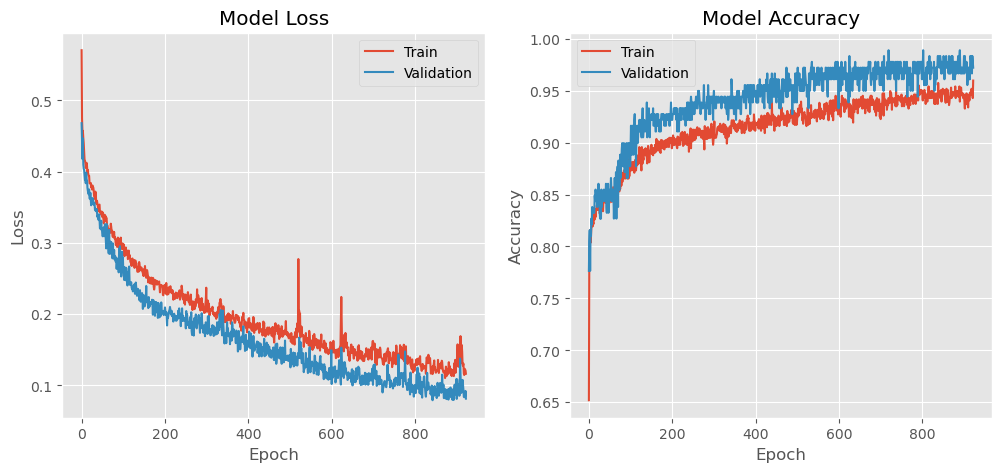

In [67]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [68]:
history_5.history['val_accuracy']

[0.7765362858772278,
 0.8044692873954773,
 0.8156424760818481,
 0.7765362858772278,
 0.8156424760818481,
 0.8100558519363403,
 0.826815664768219,
 0.8212290406227112,
 0.8379888534545898,
 0.832402229309082,
 0.832402229309082,
 0.832402229309082,
 0.832402229309082,
 0.832402229309082,
 0.8491619825363159,
 0.8435754179954529,
 0.8547486066818237,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.8379888534545898,
 0.8491619825363159,
 0.8491619825363159,
 0.8603351712226868,
 0.8491619825363159,
 0.8491619825363159,
 0.832402229309082,
 0.826815664768219,
 0.8435754179954529,
 0.826815664768219,
 0.8547486066818237,
 0.8379888534545898,
 0.8491619825363159,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.8547486066818237,
 0.8491619825363159,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.8603351712226868,
 0.8379888534545898,
 0.832402229309082,
 0.8491619825363159,
 0.8379888534545898,
 0.8603351712226868,
 0.832402229309082,
 0.

In [69]:
test_predictions = model_5.predict(test)
test_predictions = (test_predictions > 0.5).astype(int).flatten()
# Prepare submission file
submission_df = pd.DataFrame({
    "PassengerId": range(892, 892 + len(test_predictions)),
    "Survived": test_predictions
})

# Save submission file
submission_df.to_csv("submission_005_drop02_epo1000.csv", index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
